## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# from skimage.feature import graycomatrix, graycoprops
# from skimage import io, color, img_as_ubyte
# import os
# import cv2

# **Metadata**

<ipython-input-2-e6e8bc0e1e1d>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfMetaData[col] = dfMetaData[col].fillna(mode_value)


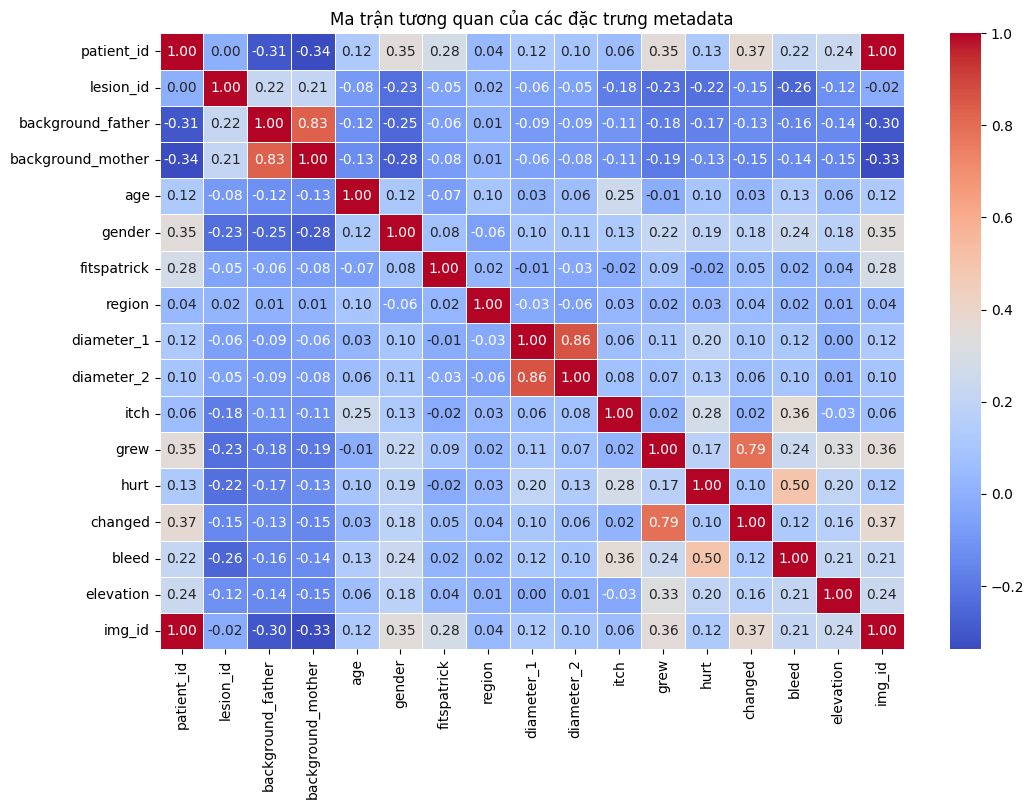

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,diagnostic
0,297,1765,False,False,9,7,8,False,0,False,...,8.0,0,0,0,0,0,0,456,False,NEV
1,887,881,False,False,9,7,55,False,0,True,...,5.0,1,1,0,1,1,1,1446,True,BCC
2,314,1867,False,False,9,7,77,False,0,False,...,8.0,1,0,0,0,0,0,478,False,ACK
3,567,4061,False,False,9,7,75,False,0,False,...,8.0,1,0,0,0,0,0,845,False,ACK
4,1080,1302,False,True,9,7,79,False,1,True,...,5.0,1,1,0,0,1,1,1770,True,BCC


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

dfMetaData = pd.read_csv("/kaggle/input/metadata/metadata.csv")

dfDiagnostic = dfMetaData['diagnostic']

dfMetaData = dfMetaData.drop(['diagnostic'], axis=1)

for col in dfMetaData.columns:
    if dfMetaData[col].dtype == 'object':  
        mode_value = dfMetaData[col].mode()[0]
        dfMetaData[col] = dfMetaData[col].fillna(mode_value)
    else:
        median_value = dfMetaData[col].median()
        dfMetaData[col] = dfMetaData[col].fillna(median_value)

label_encoders = {}
for col in dfMetaData.columns:
    if dfMetaData[col].dtype == 'object':  
        le = LabelEncoder()
        dfMetaData[col] = le.fit_transform(dfMetaData[col].astype(str))
        label_encoders[col] = le

dfMetaData['diagnostic'] = dfDiagnostic

dfMetaData.to_csv("Processed_Metadata.csv", index=False)

dfMetaData_numeric = dfMetaData.select_dtypes(include=[np.number])

corr_matrix = dfMetaData_numeric.corr()
df = pd.DataFrame(corr_matrix)
df.to_csv("correlation_matrix.csv", index=False)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan của các đặc trưng metadata")
plt.show()

dfMetaData.head()